In [28]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [29]:
# load a data file
# note the relative filepath! where is this file located?
designation_gdf = gpd.read_file('data/D7CaltransStreetDesignation.geojson')

In [30]:
designation_gdf.head()

,OBJECTID,SECT_ID,STREET_DES,PRIME,FROM_,TO_,SURF1,ST_TYPE,ZWIDTH,Shape__Length,geometry
0,1,5542400,Secondary Highway,VANOWEN ST,WOODMAN AV,MAMMOTH AV,Asphalt,Select,65,100.580938,"LINESTRING (-118.43127 34.19394, -118.43236 34..."
1,2,5541300,Secondary Highway,VANOWEN ST,GOODLAND AV,COLDWATER CANYON AV,Asphalt,Select,66,171.890104,"LINESTRING (-118.41194 34.19394, -118.41380 34..."
2,3,5541100,Secondary Highway,VANOWEN ST,BABCOCK AV,BELLAIRE AV,Asphalt,Select,66,199.441843,"LINESTRING (-118.40727 34.19395, -118.40943 34..."
3,4,3792300,Collector Street,MORSE AVE,VANOWEN ST,WELBY WY,Asphalt,Local,36,94.309910,"LINESTRING (-118.41727 34.19310, -118.41731 34..."
4,5,4688700,Collector Street,ST CLAIR AVE,VANOWEN ST,ARCHWOOD ST,Asphalt,Local,36,201.335985,"LINESTRING (-118.39980 34.19213, -118.39980 34..."


In [31]:
designation_gdf.tail()

,OBJECTID,SECT_ID,STREET_DES,PRIME,FROM_,TO_,SURF1,ST_TYPE,ZWIDTH,Shape__Length,geometry
72108,72109,0948100,Local Street,CANTON DR,CANTON DR CONNECTOR,CANTON WY,Asphalt,Local,16,168.460768,"LINESTRING (-118.38190 34.13300, -118.38256 34..."
72109,72110,2976600,Local Street,KITTYHAWK AVE,DE HAVILAND AV,EARHART AV,Asphalt,Local,32,90.113565,"LINESTRING (-118.39298 33.95767, -118.39306 33..."
72110,72111,6609900,Local Street,65TH ST,SAN PEDRO ST,MAIN ST,Asphalt,Local,40,404.657650,"LINESTRING (-118.27394 33.98060, -118.27387 33..."
72111,72112,6766500,Secondary Highway,108TH ST,AVALON BL,TOWNE AV,Asphalt,Select,30,201.182513,"LINESTRING (-118.26735 33.93828, -118.26730 33..."
72112,72113,1890300,Local Street,F ST,FRIES AV,ISLAND AV,Concrete,Local,46,120.826018,"LINESTRING (-118.26482 33.77694, -118.26547 33..."


In [32]:
designation_gdf.shape

(72113, 11)

<AxesSubplot:>

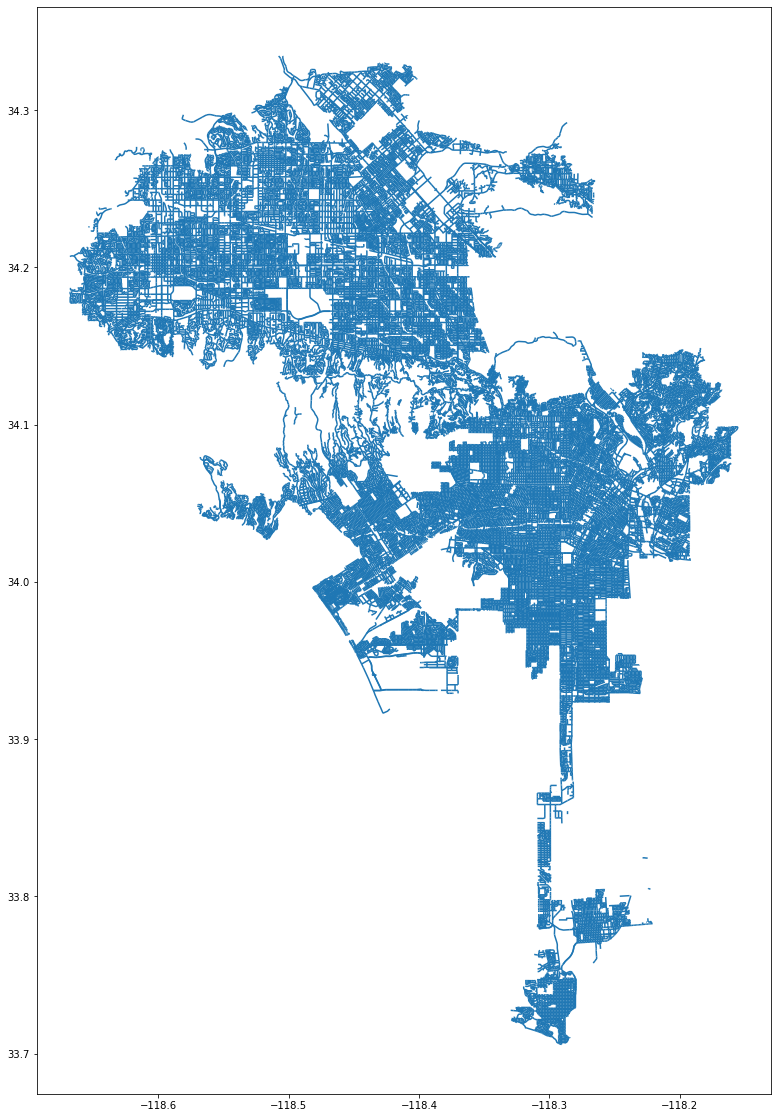

In [33]:
designation_gdf.plot(figsize=(20,20))

In [34]:
crashes_df = pd.read_csv('data/80locations.csv')

In [35]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
crashes_gdf = gpd.GeoDataFrame(crashes_df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(crashes_df.point_x, crashes_df.point_y)) 

In [36]:
crashes_gdf

,point_x,point_y,match_addr,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (-118.27032 34.06666)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (-118.26521 33.92548)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (-118.33348 34.07616)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (-118.25608 34.01604)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (-118.25652 33.95390)
...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96726)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",POINT (-118.30902 33.96621)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",POINT (-118.36251 34.06303)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",POINT (-118.57142 34.17699)


<AxesSubplot:>

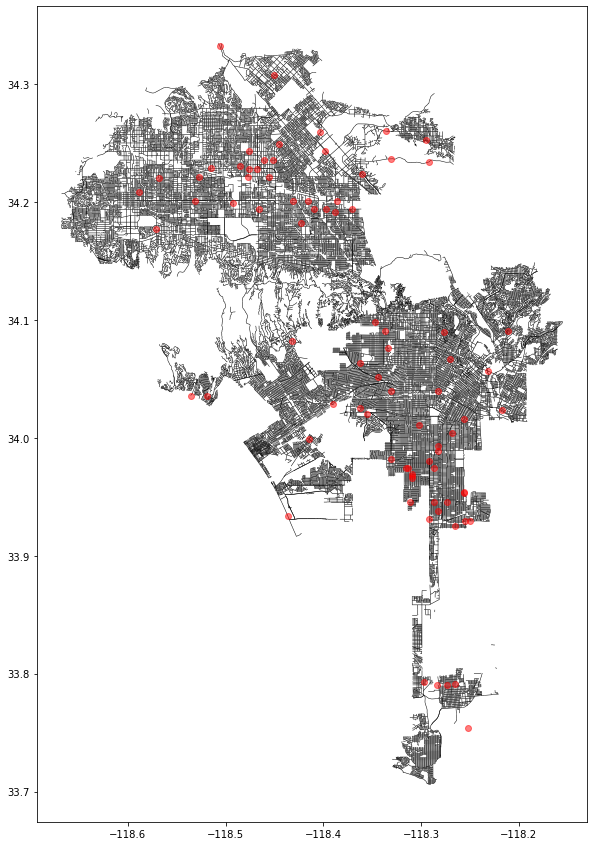

In [37]:
# compare
fig,ax = plt.subplots(figsize=(15,15))

# blue background of census tracts
crashes_gdf.plot(ax=ax,zorder=10,alpha=0.5, color='red') #alpha is transparency, #zoder: order they are layered, higher is on top

# while lines to show block groups (sandwiched between the two layers above for visual clarity)
designation_gdf.plot(ax=ax,color='black',zorder=5,lw=0.5) #boundary makes it just draw the outline, not the fill

In [38]:
##reproject 
designation_gdf = designation_gdf.to_crs("EPSG:2229")
crashes_gdf = crashes_gdf.to_crs("EPSG:2229")

In [39]:
designation_gdf

,OBJECTID,SECT_ID,STREET_DES,PRIME,FROM_,TO_,SURF1,ST_TYPE,ZWIDTH,Shape__Length,geometry
0,1,5542400,Secondary Highway,VANOWEN ST,WOODMAN AV,MAMMOTH AV,Asphalt,Select,65,100.580938,"LINESTRING (6431252.672 1893240.053, 6430922.6..."
1,2,5541300,Secondary Highway,VANOWEN ST,GOODLAND AV,COLDWATER CANYON AV,Asphalt,Select,66,171.890104,"LINESTRING (6437098.181 1893217.569, 6436534.1..."
2,3,5541100,Secondary Highway,VANOWEN ST,BABCOCK AV,BELLAIRE AV,Asphalt,Select,66,199.441843,"LINESTRING (6438509.480 1893212.177, 6437855.0..."
3,4,3792300,Collector Street,MORSE AVE,VANOWEN ST,WELBY WY,Asphalt,Local,36,94.309910,"LINESTRING (6435484.264 1892916.759, 6435470.7..."
4,5,4688700,Collector Street,ST CLAIR AVE,VANOWEN ST,ARCHWOOD ST,Asphalt,Local,36,201.335985,"LINESTRING (6440764.973 1892541.783, 6440767.4..."
...,...,...,...,...,...,...,...,...,...,...,...
72108,72109,0948100,Local Street,CANTON DR,CANTON DR CONNECTOR,CANTON WY,Asphalt,Local,16,168.460768,"LINESTRING (6446095.474 1871004.498, 6445895.7..."
72109,72110,2976600,Local Street,KITTYHAWK AVE,DE HAVILAND AV,EARHART AV,Asphalt,Local,32,90.113565,"LINESTRING (6442493.088 1807210.520, 6442468.2..."
72110,72111,6609900,Local Street,65TH ST,SAN PEDRO ST,MAIN ST,Asphalt,Local,40,404.657650,"LINESTRING (6478615.789 1815435.128, 6478638.2..."
72111,72112,6766500,Secondary Highway,108TH ST,AVALON BL,TOWNE AV,Asphalt,Select,30,201.182513,"LINESTRING (6480573.960 1800030.568, 6480587.3..."


In [40]:
crashes_gdf

,point_x,point_y,match_addr,geometry
0,-118.270324,34.066662,"ALVARADO ST & BEVERLY BLVD, LOS ANGELES, CA",POINT (6479796.506 1846751.793)
1,-118.265210,33.925480,"AVALON BLVD & 118TH PL, LOS ANGELES, CA",POINT (6481209.552 1795368.811)
2,-118.333482,34.076157,"BEVERLY BLVD & HUDSON AVE, LOS ANGELES, CA",POINT (6460679.904 1850264.562)
3,-118.256083,34.016045,"CENTRAL AVE & 29TH ST, LOS ANGELES, CA",POINT (6484062.500 1828319.960)
4,-118.256519,33.953896,"CENTRAL AVE & 91ST ST, LOS ANGELES, CA",POINT (6483872.563 1805703.031)
...,...,...,...,...
77,-118.309022,33.967258,"WESTERN AVE & 79TH ST, LOS ANGELES, CA",POINT (6467965.175 1810610.840)
78,-118.309024,33.966213,"WESTERN AVE & 80TH ST, LOS ANGELES, CA",POINT (6467963.429 1810230.466)
79,-118.362514,34.063030,"WILSHIRE BLVD & FAIRFAX AVE, LOS ANGELES, CA",POINT (6451871.308 1845518.088)
80,-118.571422,34.176991,"WINNETKA AVE & HATTERAS ST, LOS ANGELES, CA",POINT (6388835.054 1887283.624)


In [41]:
crashes_designations = crashes_gdf.sjoin_nearest(designation_gdf, how="inner")


AttributeError: 'GeoDataFrame' object has no attribute 'sjoin_nearest'

In [43]:
from shapely.geometry import *

In [44]:
designation_gdf.geometry.sindex.nearest(Point(6479796.506, 1846751.793))

TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

In [ ]:
designation_gdf.type

In [ ]:
crashes_gdf.type

In [ ]:
crashes_gdf.info()

In [ ]:
designation_gdf.info()